# Linear Regression
I'm using the 2022 data for e-bikes as an example.

In [ ]:
#Install any packages you need
! pip install pandas
! pip install matplotlib
! pip install statsmodels
! pip install sklearn
! pip install numpy

In [ ]:
#Mount Google Drive so we can get the csv file
from google.colab import drive
drive.mount('/content/drive')

Format and setup the data for easier manipulation

In [20]:
import pandas as pd

data = pd.read_csv("Data.csv")
#These are the values most likely to change
xField = "Year"
yField = "Europe"

for i in data.columns:
    data[i] = pd.to_numeric(data[i], errors="coerce")

data = data.dropna(subset=[yField])
data.head()

,Year,United States,Europe,France,China,India,Japan
0,2006,NaN,98.0,NaN,NaN,NaN,NaN
1,2007,NaN,173.0,NaN,NaN,NaN,NaN
2,2008,NaN,279.0,15.0,NaN,NaN,NaN
3,2009,NaN,422.0,24.0,NaN,NaN,NaN
4,2010,NaN,588.0,38.0,NaN,NaN,NaN


Plot the raw data just to see what it looks like

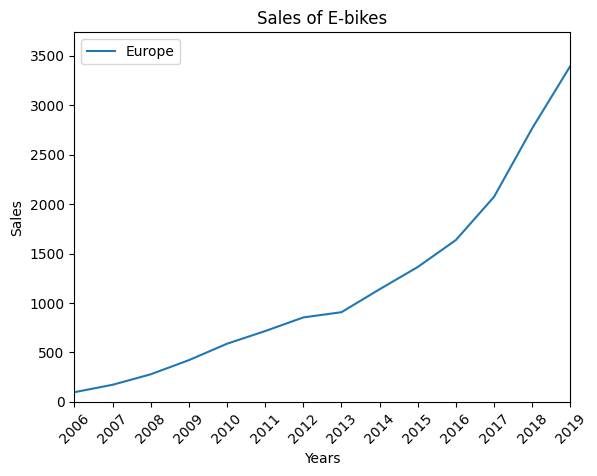

In [21]:
from matplotlib import pyplot as plt

def plotting(x, y):
    plt.title("Sales of E-bikes")
    plt.xlabel("Years")
    plt.ylabel("Sales")

    plt.xlim(x.iloc[0], x.iloc[-1])
    plt.ylim(0, max(y) * 1.1)
    plt.xticks(x[::1], rotation=45, fontsize=10)

    plt.legend(loc="upper left")

plt.plot(data[xField], data[yField], label=yField)
plotting(data[xField], data[yField])

Calculates Pearson's Correlation Coefficient to see linearity of data and calculates p value to see the likelihood that the data isn't correlated

In [22]:
from scipy.stats import pearsonr

coefficient, pValue = pearsonr(data[xField], data[yField])
print(f"Pearson's Correlation Coefficient: {coefficient}, P value: {pValue}")

Pearson's Correlation Coefficient: 0.9386622865497585, P value: 6.730964276466104e-07


Generate the model

In [23]:
from statsmodels import api as sm

linearRegression = sm.OLS(data[yField], sm.add_constant(data[xField])).fit()
linearRegression.summary()

c:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Europe   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     88.91
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           6.73e-07
Time:                        21:14:15   Log-Likelihood:                -101.04
No. Observations:                  14   AIC:                             206.1
Df Residuals:                      12   BIC:                             207.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.468e+05   4.75e+04     -9.405      0.000    -5.5e+05   -3.43e+05
Year         222.6000     23.607      9.429      0.000     171.165     274.035
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.425
Skew:                           0.779   Prob(JB):                        0.490
Kurtosis:                       2.869   Cond. No.                     1.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Plot the model with the actual data

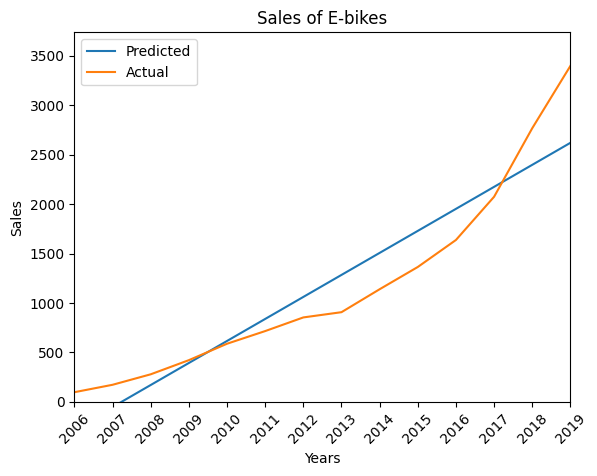

In [24]:
prediction = linearRegression.predict(sm.add_constant(data[[xField]]))
predictionTable = pd.DataFrame({xField: data[xField], yField: prediction})

plt.plot(predictionTable[xField], predictionTable[yField], label="Predicted")
plt.plot(data[xField], data[yField], label="Actual")
plotting(data[xField], data[yField])

Calculate error of the model. The higher the score, the more accurate.

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(data[yField], predictionTable[yField]))
mean = data[yField].mean()
print(f"Mean: {mean}, RMSE: {rmse}, Score: {1 - rmse / mean}")

Mean: 1172.5, RMSE: 329.65323772542695, Score: 0.718845852686203


Plot future prediction with actual data

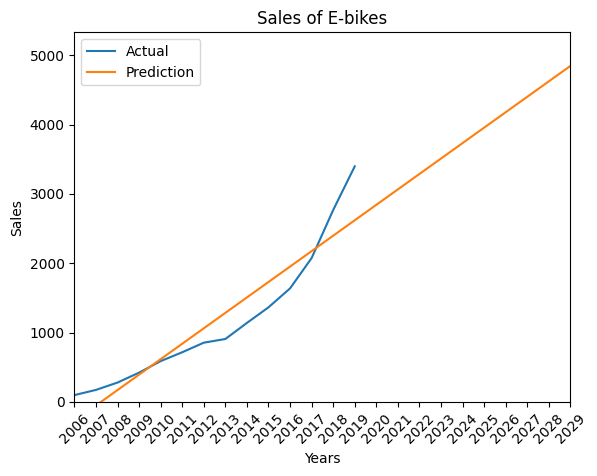

In [26]:
from numpy import arange

furtureAmount = 10
xRange = arange(data[xField].iloc[0], data[xField].iloc[-1] + furtureAmount + 1, 1)
futurePredictedValue = linearRegression.predict(sm.add_constant(pd.DataFrame({xField: xRange})))
predictionTable = pd.DataFrame({xField: xRange, yField: futurePredictedValue})

plt.plot(data[xField], data[yField], label="Actual")
plt.plot(predictionTable[xField], predictionTable[yField], label="Prediction")

plotting(predictionTable[xField], predictionTable[yField])